In [5]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [9]:
def avg_last_execution(files_path, drift_detector, generator):
    
    results = []
    for file in files_path:
        #print(file)
        df = pd.read_csv(file)
        results.append(df.iloc[-1]['classifications correct (percent)'])
        #print(df.iloc[-1]['classifications correct (percent)'])
    
    tuple_results = tuple([np.mean(results), np.std(results), drift_detector, generator])
   
    #print(f'avg of all last execution: {np.mean(median)}')
    return tuple_results 

In [7]:
drift_detectors_params = [
                              {"id": "DDM", "drift_name": "DDM", "params": ""},    \
                              {"id": "EDDM", "drift_name": "EDDM", "params": ""},   \
                              {"id": "ADWIN", "drift_name": "ADWINChangeDetector", "params": ""},  \
                              {"id": "ECDD", "drift_name": "EWMAChartDM", "params": ""},   \
                              {"id": "STEPD", "drift_name": "STEPD", "params": ""},  \
                              {"id": "SeqDrift2", "drift_name": "SeqDrift2ChangeDetector", "params": ""},  \
                              {"id": "SEED", "drift_name": "SEEDChangeDetector", "params": ""},   \
                              {"id": "HDDM_A_Test", "drift_name": "HDDM_A_Test", "params": ""},  \
                              {"id": "HDDM_W_Test", "drift_name": "HDDM_W_Test", "params": ""},  \
                              #{"id": "FHDDM", "drift_name": "FHDDM", "params": ""},  \
                              #{"id": "FTDD", "drift_name": "FTDD", "params": ""},   \
                              {"id": "RDDM_30", "drift_name": "RDDM", "params": "-n 30 -w 2 -o 3"}, \
                              {"id": "RDDM","drift_name": "RDDM", "params": ""},   \
                              #{"id": "WSTD","drift_name": "WSTD", "params": ""},
                              {"id": "NoChangeDetector","drift_name": "NoChangeDetectorNaive", "params": ""}
                        ]

## Ranking Gradual HoeffdingTree

In [10]:
classificator = "trees.HoeffdingTree"
data_stream = [{"data_size": 10000, "drift_position":  [2000, 2000, 2000, 2000]},   \
                {"data_size": 20000, "drift_position": [4000, 4000, 4000, 4000]},    \
                {"data_size": 50000, "drift_position": [10000, 10000, 10000, 10000]}, \
                {"data_size": 100000, "drift_position":[20000, 20000, 20000, 20000]}, \
                {"data_size": 500000, "drift_position":  [100000, 100000, 100000, 100000]}, \
                {"data_size": 1000000, "drift_position":  [200000, 200000, 200000, 200000]}, \
                {"data_size": 2000000, "drift_position": [400000, 400000, 400000, 400000]} 
               ]
type_drift = "Gradual"
dict_drift_type = {"gradual_agraw1": "AGRAW1", "gradual_agraw2": "AGRAW2", "gradual_led": "LED", 
                    "gradual_mixed": "MIXED", "gradual_randomRBF": "RANDOM_RBF", "gradual_sine": "SINE", "gradual_waveform": "WAVEFORM"}

df_result_pivot_rank_gradual_ht = pd.DataFrame()
df_result_pivot_rank = pd.DataFrame()
for data_stream_key in data_stream:
    df_final_result = pd.DataFrame()
    for drift_key, drift_value in dict_drift_type.items():
        
        tuple_list_result = list()
        for drift in drift_detectors_params:
            files_path = glob.glob(f'{drift_key}/{classificator}_{drift["id"]}_{data_stream_key["data_size"]}_*_{drift_value}_{type_drift}.csv')
            #print(files_path)
            tuple_result = avg_last_execution(files_path, drift["id"], drift_value)
            tuple_list_result.append(tuple_result)
        
        #print(f'tuple list result: {tuple_list_result}')
        df_result = pd.DataFrame(tuple_list_result, columns=['avg', 'std', 'drift_detector', 'generator'])
        df_final_result = pd.concat([df_final_result, df_result])

    df_result_pivot = df_final_result.reset_index().pivot(index="generator", columns="drift_detector", values="avg")
    df_result_pivot_rank_gradual_ht = pd.concat([df_result_pivot_rank_gradual_ht, df_result_pivot.rank(1, ascending=False, method='first')])


df_result_pivot_rank_gradual_ht.describe()

drift_detector,ADWIN,DDM,ECDD,EDDM,HDDM_A_Test,HDDM_W_Test,NoChangeDetector,RDDM,RDDM_30,SEED,STEPD,SeqDrift2
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0,49.000000,49.000000,49.000000,49.00000,49.000000
mean,3.653061,2.836735,10.224490,6.061224,4.428571,4.714286,12.0,4.244898,4.346939,9.979592,8.00000,7.510204
std,2.268911,1.982706,0.918906,2.734107,1.338532,2.440970,0.0,2.287016,1.854623,1.613611,2.01039,2.246501
min,1.000000,1.000000,8.000000,1.000000,2.000000,1.000000,12.0,1.000000,1.000000,2.000000,1.00000,2.000000
25%,2.000000,1.000000,10.000000,4.000000,3.000000,2.000000,12.0,2.000000,3.000000,10.000000,8.00000,7.000000
50%,3.000000,2.000000,11.000000,7.000000,5.000000,5.000000,12.0,4.000000,4.000000,10.000000,9.00000,8.000000
75%,5.000000,4.000000,11.000000,8.000000,5.000000,6.000000,12.0,6.000000,6.000000,11.000000,9.00000,10.000000
max,9.000000,7.000000,11.000000,11.000000,8.000000,9.000000,12.0,8.000000,9.000000,11.000000,10.00000,10.000000


## Ranking Abrupt HoeffdingTree

In [11]:
classificator = "trees.HoeffdingTree"
data_stream = [{"data_size": 10000, "drift_position":  [2000, 2000, 2000, 2000]},   \
                {"data_size": 20000, "drift_position": [4000, 4000, 4000, 4000]},    \
                {"data_size": 50000, "drift_position": [10000, 10000, 10000, 10000]}, \
                {"data_size": 100000, "drift_position":[20000, 20000, 20000, 20000]}, \
                {"data_size": 500000, "drift_position":  [100000, 100000, 100000, 100000]}, \
                {"data_size": 1000000, "drift_position":  [200000, 200000, 200000, 200000]}, \
                {"data_size": 2000000, "drift_position": [400000, 400000, 400000, 400000]} 
               ]
type_drift = "Abrupt"
dict_drift_type = {"abrupt_agraw1": "AGRAW1", "abrupt_agraw2": "AGRAW2", "abrupt_led": "LED", "abrupt_mixed": "MIXED", "abrupt_randomRBF": "RANDOM_RBF",  
                    "abrupt_sine": "SINE", "abrupt_waveform": "WAVEFORM"}

df_result_pivot_rank_abrupt_ht = pd.DataFrame()
df_result_pivot_rank = pd.DataFrame()
for data_stream_key in data_stream:
    df_final_result = pd.DataFrame()
    for drift_key, drift_value in dict_drift_type.items():    

        tuple_list_result = list()
        for drift in drift_detectors_params:
            files_path = glob.glob(f'{drift_key}/{classificator}_{drift["id"]}_{data_stream_key["data_size"]}_*_{drift_value}_{type_drift}.csv')
            #print(files_path)
            tuple_result = avg_last_execution(files_path, drift["id"], drift_value)
            tuple_list_result.append(tuple_result)
                            
        df_result = pd.DataFrame(tuple_list_result, columns=['avg', 'std', 'drift_detector', 'generator'])
        df_final_result = pd.concat([df_final_result, df_result])

    df_result_pivot = df_final_result.reset_index().pivot(index="generator", columns="drift_detector", values="avg")
    df_result_pivot_rank_abrupt_ht = pd.concat([df_result_pivot_rank_abrupt_ht, df_result_pivot.rank(1,ascending=False, method='first')])


df_result_pivot_rank_abrupt_ht.describe()

drift_detector,ADWIN,DDM,ECDD,EDDM,HDDM_A_Test,HDDM_W_Test,NoChangeDetector,RDDM,RDDM_30,SEED,STEPD,SeqDrift2
count,49.000000,49.000000,48.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,3.571429,4.183673,10.125000,6.612245,2.897959,4.081633,11.979592,4.469388,5.102041,9.673469,7.346939,7.918367
std,2.263846,2.288317,1.064415,2.841774,1.245741,2.856548,0.142857,2.042283,1.310930,1.505376,2.487896,2.280686
min,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,11.000000,1.000000,2.000000,5.000000,1.000000,2.000000
25%,2.000000,2.000000,9.000000,5.000000,2.000000,1.000000,12.000000,3.000000,4.000000,9.000000,7.000000,7.000000
50%,3.000000,4.000000,10.500000,7.000000,3.000000,4.000000,12.000000,5.000000,5.000000,10.000000,8.000000,8.000000
75%,5.000000,6.000000,11.000000,9.000000,4.000000,7.000000,12.000000,6.000000,6.000000,11.000000,9.000000,10.000000
max,9.000000,10.000000,11.000000,11.000000,5.000000,9.000000,12.000000,8.000000,8.000000,11.000000,10.000000,11.000000


## Ranking Gradual NaiveBayes

In [12]:
classificator = "bayes.NaiveBayes"
data_stream = [{"data_size": 10000, "drift_position":  [2000, 2000, 2000, 2000]},   \
                {"data_size": 20000, "drift_position": [4000, 4000, 4000, 4000]},    \
                {"data_size": 50000, "drift_position": [10000, 10000, 10000, 10000]}, \
                {"data_size": 100000, "drift_position":[20000, 20000, 20000, 20000]}, \
                {"data_size": 500000, "drift_position":  [100000, 100000, 100000, 100000]}, \
                {"data_size": 1000000, "drift_position":  [200000, 200000, 200000, 200000]}, \
                {"data_size": 2000000, "drift_position": [400000, 400000, 400000, 400000]} 
               ]

type_drift = "Gradual"
dict_drift_type = {"gradual_agraw1": "AGRAW1", "gradual_agraw2": "AGRAW2", "gradual_led": "LED", 
                    "gradual_mixed": "MIXED", "gradual_randomRBF": "RANDOM_RBF", "gradual_sine": "SINE", "gradual_waveform": "WAVEFORM"}

df_result_pivot_rank_gradual_nb = pd.DataFrame()
df_result_pivot_rank = pd.DataFrame()
for data_stream_key in data_stream:
    df_final_result = pd.DataFrame()
    for drift_key, drift_value in dict_drift_type.items():    

        tuple_list_result = list()
        for drift in drift_detectors_params:
            files_path = glob.glob(f'{drift_key}/{classificator}_{drift["id"]}_{data_stream_key["data_size"]}_*_{drift_value}_{type_drift}.csv')
            #print(files_path)
            tuple_result = avg_last_execution(files_path, drift["id"], drift_value)
            tuple_list_result.append(tuple_result)
                            
        df_result = pd.DataFrame(tuple_list_result, columns=['avg', 'std', 'drift_detector', 'generator'])
        df_final_result = pd.concat([df_final_result, df_result])

    df_result_pivot = df_final_result.reset_index().pivot(index="generator", columns="drift_detector", values="avg")
    df_result_pivot_rank_gradual_nb = pd.concat([df_result_pivot_rank_gradual_nb, df_result_pivot.rank(1,ascending=False, method='first')])


df_result_pivot_rank_gradual_nb.describe()

drift_detector,ADWIN,DDM,ECDD,EDDM,HDDM_A_Test,HDDM_W_Test,NoChangeDetector,RDDM,RDDM_30,SEED,STEPD,SeqDrift2
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,49.000000
mean,3.040816,5.775510,10.061224,7.938776,3.959184,5.387755,12.0,3.204082,4.040816,8.122449,8.285714,6.183673
std,2.101182,2.931619,0.987593,2.764418,1.513263,2.683408,0.0,2.309217,1.743550,2.513569,1.290994,2.941609
min,1.000000,1.000000,8.000000,2.000000,1.000000,1.000000,12.0,1.000000,1.000000,4.000000,5.000000,1.000000
25%,1.000000,3.000000,9.000000,7.000000,3.000000,2.000000,12.0,1.000000,3.000000,6.000000,8.000000,4.000000
50%,3.000000,6.000000,10.000000,9.000000,4.000000,6.000000,12.0,3.000000,4.000000,8.000000,8.000000,6.000000
75%,5.000000,8.000000,11.000000,10.000000,5.000000,8.000000,12.0,5.000000,5.000000,11.000000,9.000000,9.000000
max,9.000000,11.000000,11.000000,11.000000,7.000000,9.000000,12.0,8.000000,8.000000,11.000000,10.000000,11.000000


## Ranking Abrup NaiveBayes

In [13]:
classificator = "bayes.NaiveBayes"
data_stream = [{"data_size": 10000, "drift_position":  [2000, 2000, 2000, 2000]},   \
                {"data_size": 20000, "drift_position": [4000, 4000, 4000, 4000]},    \
                {"data_size": 50000, "drift_position": [10000, 10000, 10000, 10000]}, \
                {"data_size": 100000, "drift_position":[20000, 20000, 20000, 20000]}, \
                {"data_size": 500000, "drift_position":  [100000, 100000, 100000, 100000]}, \
                {"data_size": 1000000, "drift_position":  [200000, 200000, 200000, 200000]}, \
                {"data_size": 2000000, "drift_position": [400000, 400000, 400000, 400000]} 
               ]

type_drift = "Abrupt"
dict_drift_type = {"abrupt_agraw1": "AGRAW1", "abrupt_agraw2": "AGRAW2", "abrupt_led": "LED", "abrupt_mixed": "MIXED", "abrupt_randomRBF": "RANDOM_RBF",  
                    "abrupt_sine": "SINE", "abrupt_waveform": "WAVEFORM"}

df_result_pivot_rank_abrupt_nb = pd.DataFrame()
df_result_pivot_rank = pd.DataFrame()
for data_stream_key in data_stream:
    df_final_result = pd.DataFrame()
    for drift_key, drift_value in dict_drift_type.items():    

        tuple_list_result = list()
        for drift in drift_detectors_params:
            files_path = glob.glob(f'{drift_key}/{classificator}_{drift["id"]}_{data_stream_key["data_size"]}_*_{drift_value}_{type_drift}.csv')
            #print(files_path)
            tuple_result = avg_last_execution(files_path, drift["id"], drift_value)
            tuple_list_result.append(tuple_result)
                            
        df_result = pd.DataFrame(tuple_list_result, columns=['avg', 'std', 'drift_detector', 'generator'])
        df_final_result = pd.concat([df_final_result, df_result])

    df_result_pivot = df_final_result.reset_index().pivot(index="generator", columns="drift_detector", values="avg")
    df_result_pivot_rank_abrupt_nb = pd.concat([df_result_pivot_rank_abrupt_nb, df_result_pivot.rank(1,ascending=False, method='first')])

df_result_pivot_rank_abrupt_nb.describe()

drift_detector,ADWIN,DDM,ECDD,EDDM,HDDM_A_Test,HDDM_W_Test,NoChangeDetector,RDDM,RDDM_30,SEED,STEPD,SeqDrift2
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,49.000000
mean,3.040816,6.877551,9.755102,8.571429,3.265306,4.489796,12.0,3.510204,5.469388,7.346939,6.897959,6.775510
std,2.061140,3.364228,1.181994,2.449490,1.203736,3.202359,0.0,1.634555,1.582483,2.650087,2.616016,2.800783
min,1.000000,1.000000,6.000000,2.000000,1.000000,1.000000,12.0,1.000000,1.000000,4.000000,1.000000,2.000000
25%,1.000000,4.000000,9.000000,8.000000,2.000000,1.000000,12.0,3.000000,5.000000,5.000000,5.000000,5.000000
50%,2.000000,8.000000,10.000000,9.000000,3.000000,4.000000,12.0,3.000000,6.000000,7.000000,8.000000,7.000000
75%,5.000000,9.000000,11.000000,10.000000,4.000000,8.000000,12.0,4.000000,6.000000,11.000000,9.000000,10.000000
max,9.000000,11.000000,11.000000,11.000000,6.000000,9.000000,12.0,7.000000,8.000000,11.000000,10.000000,11.000000


In [14]:
from autorank import autorank, plot_stats, create_report, latex_table

## Nemenyi test Gradual NaiveBayes 

In [15]:
result = autorank(df_result_pivot_rank_gradual_nb, order='ascending', alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
                   meanrank  median  mad ci_lower ci_upper effect_size   
drift_detector                                                           
ADWIN              3.040816     3.0  2.0      1.0      5.0         0.0  \
RDDM               3.204082     3.0  2.0      1.0      6.0         0.0   
HDDM_A_Test        3.959184     4.0  1.0      3.0      6.0   -0.426585   
RDDM_30            4.040816     4.0  1.0      3.0      6.0   -0.426585   
HDDM_W_Test        5.387755     6.0  2.0      2.0      8.0   -1.011736   
DDM                5.775510     6.0  2.0      2.0      9.0   -1.011736   
SeqDrift2          6.183673     6.0  2.0      4.0     10.0   -1.011736   
EDDM               7.938776     9.0  2.0      5.0     10.0   -2.023472   
SEED               8.122449     8.0  3.0      6.0     11.0   -1.322785   
STEPD              8.285714     8.0  1.0      7.0      9.0   -2.132927   
ECDD              10.061224    10.0  1.0      9.0     11.0   -2.986098   
NoChangeDetector  1

/home/brenno/.pyenv/versions/3.10.11/envs/ipython/lib/python3.10/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


<Figure size 1040x800 with 0 Axes>

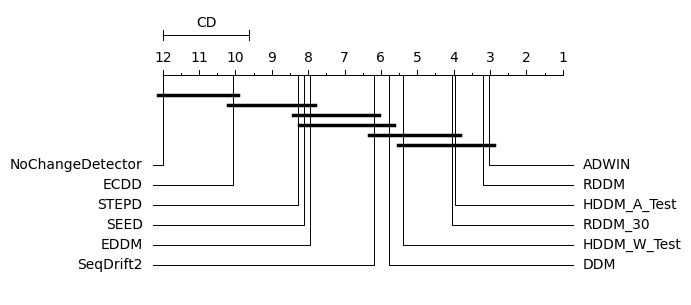

In [16]:
plt.figure(figsize=(13,10), dpi= 80)
plot_stats(result)
plt.show()

## Nemenyi test Abrup NaiveBayes 

In [17]:
result = autorank(df_result_pivot_rank_abrupt_nb, order='ascending', alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
                   meanrank  median  mad ci_lower ci_upper effect_size   
drift_detector                                                           
ADWIN              3.040816     2.0  1.0      1.0      5.0         0.0  \
HDDM_A_Test        3.265306     3.0  1.0      2.0      4.0   -0.674491   
RDDM               3.510204     3.0  1.0      2.0      5.0   -0.674491   
HDDM_W_Test        4.489796     4.0  3.0      1.0      8.0   -0.603283   
RDDM_30            5.469388     6.0  1.0      5.0      7.0   -2.697963   
SeqDrift2          6.775510     7.0  2.0      4.0     10.0   -2.132927   
DDM                6.877551     8.0  2.0      2.0     10.0   -2.559512   
STEPD              6.897959     8.0  1.0      5.0      9.0   -4.046945   
SEED               7.346939     7.0  2.0      5.0     11.0   -2.132927   
EDDM               8.571429     9.0  1.0      7.0     11.0   -4.721435   
ECDD               9.755102    10.0  1.0      9.0     11.0   -5.395926   
NoChangeDetector  1

/home/brenno/.pyenv/versions/3.10.11/envs/ipython/lib/python3.10/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


<Figure size 1040x800 with 0 Axes>

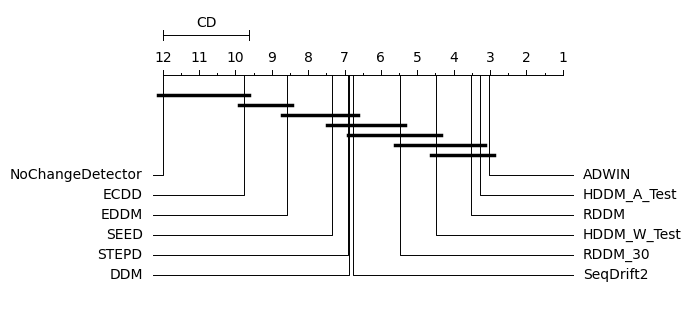

In [18]:
plt.figure(figsize=(13,10), dpi= 80)
plot_stats(result)
plt.show()

## Nemenyi Test Abrup HT 

In [19]:
result = autorank(df_result_pivot_rank_abrupt_ht, order='ascending', alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
                   meanrank  median  mad ci_lower ci_upper effect_size   
drift_detector                                                           
HDDM_A_Test        2.897959     3.0  1.0      2.0      4.0         0.0  \
ADWIN              3.571429     3.0  2.0      1.0      6.0         0.0   
HDDM_W_Test        4.081633     4.0  3.0      1.0      7.0   -0.301641   
DDM                4.183673     4.0  2.0      2.0      6.0   -0.426585   
RDDM               4.469388     5.0  2.0      3.0      7.0   -0.853171   
RDDM_30            5.102041     5.0  1.0      4.0      6.0   -1.348982   
EDDM               6.612245     7.0  2.0      4.0     10.0   -1.706342   
STEPD              7.346939     8.0  1.0      7.0      9.0   -3.372454   
SeqDrift2          7.918367     8.0  1.0      7.0     10.0   -3.372454   
SEED               9.673469    10.0  1.0      9.0     11.0   -4.721435   
ECDD              10.125000    10.5  NaN      9.0     11.0         NaN   
NoChangeDetector  1

<Figure size 1040x800 with 0 Axes>

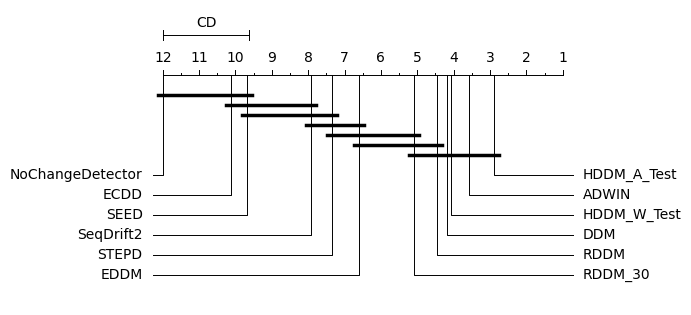

In [20]:
plt.figure(figsize=(13,10), dpi= 80)
plot_stats(result)
plt.show()

## Nemenyi Test Gradual HT 

In [21]:
result = autorank(df_result_pivot_rank_gradual_ht, order='ascending', alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
                   meanrank  median  mad ci_lower ci_upper effect_size   
drift_detector                                                           
DDM                2.836735     2.0  1.0      1.0      6.0         0.0  \
ADWIN              3.653061     3.0  2.0      2.0      6.0   -0.426585   
RDDM               4.244898     4.0  2.0      2.0      7.0   -0.853171   
RDDM_30            4.346939     4.0  1.0      3.0      6.0   -1.348982   
HDDM_A_Test        4.428571     5.0  1.0      3.0      5.0   -2.023472   
HDDM_W_Test        4.714286     5.0  2.0      2.0      7.0   -1.279756   
EDDM               6.061224     7.0  1.0      4.0      8.0   -3.372454   
SeqDrift2          7.510204     8.0  2.0      5.0     10.0   -2.559512   
STEPD              8.000000     9.0  1.0      8.0      9.0   -4.721435   
SEED               9.979592    10.0  1.0     10.0     11.0   -5.395926   
ECDD              10.224490    11.0  0.0      9.0     11.0   -8.584866   
NoChangeDetector  1

/home/brenno/.pyenv/versions/3.10.11/envs/ipython/lib/python3.10/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


<Figure size 1040x800 with 0 Axes>

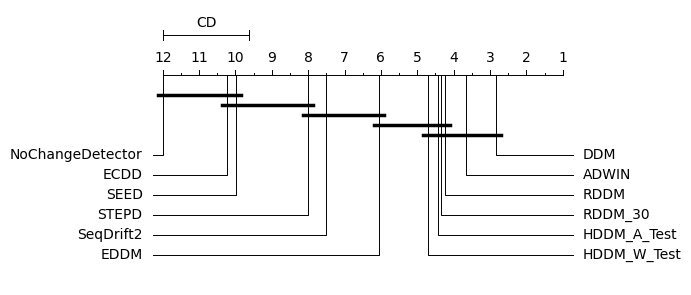

In [22]:
plt.figure(figsize=(13,10), dpi= 80)
plot_stats(result)
plt.show()